In [20]:
import os
import re
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from normflows.distributions import DiagGaussian
from dataset.TwoMoonDataset import TwoMoonDataset
import torch
from flow_models.PatchFlow import PatchFlow
import torchvision as tv
import numpy as np

In [39]:
model = 'patch_flow_simple'
version = 2
selected_checkpoint = 1
selected_step = 10000

In [40]:
regex = re.compile(r'epoch=(\d+)-step=(\d+)\.ckpt')
path_to_checkpoint = f'../tb_logs/{model}/version_{version}'
h_params = f'{path_to_checkpoint}/hparams.yaml'
checkpoints_path = f'{path_to_checkpoint}/checkpoints/'
selected_checkpoint_file = None
for filename in os.listdir(checkpoints_path):
    match = regex.match(filename)
    if match:
        epoch_index = int(match.group(1))
        it_index = int(match.group(2))
        if epoch_index == selected_checkpoint and it_index == selected_step:
            selected_checkpoint_file = filename
checkpoint_path = os.path.join(checkpoints_path, selected_checkpoint_file)
print(f'h_params:{h_params}')
print(f'Checkpoint:{checkpoint_path}')

h_params:../tb_logs/patch_flow_simple/version_2/hparams.yaml
Checkpoint:../tb_logs/patch_flow_simple/version_2/checkpoints/epoch=1-step=10000.ckpt


In [41]:
flow = PatchFlow.load_from_checkpoint(checkpoint_path=checkpoint_path, hparams_file=h_params, map_location='cpu')

In [42]:
flow.model.sample(1)

(tensor([[[[-5.7928e-01, -1.1528e+00, -8.3280e-01, -1.4026e+00, -1.6580e+00,
            -2.5581e+00, -2.7528e+00, -4.5271e+00],
           [-5.3579e-01, -1.2142e+00, -1.1286e+00, -1.5995e+00, -1.9399e+00,
            -2.7720e+00, -2.7819e+00, -4.5314e+00],
           [-5.4465e-01, -1.2517e+00,  2.4207e+00,  2.0041e+00,  4.0617e+00,
             3.4319e+00,  1.3619e+00,  1.4783e-01],
           [-4.8272e-01, -1.4686e+00,  2.1185e+00,  1.6360e+00,  3.8364e+00,
             3.2417e+00,  1.5121e+00, -8.6975e-03],
           [-5.4531e+00, -7.2309e+00, -1.5807e-01, -1.5640e+00,  2.6286e+00,
             1.5327e+00, -1.8977e+00, -2.9648e+00],
           [-5.4418e+00, -7.6010e+00, -4.8043e-01, -2.2449e+00,  2.3045e+00,
             1.0663e+00, -1.6928e+00, -3.1775e+00],
           [-7.0219e+00, -9.1595e+00, -5.3557e+00, -7.1067e+00, -4.1239e+00,
            -5.6094e+00, -6.6434e+00, -8.2429e+00],
           [-6.6276e+00, -9.2925e+00, -5.2703e+00, -7.5795e+00, -4.0536e+00,
            -5.9540e

In [53]:
num_samples = 10
samples = [flow.model.sample()[0].detach() for _ in range(num_samples)]

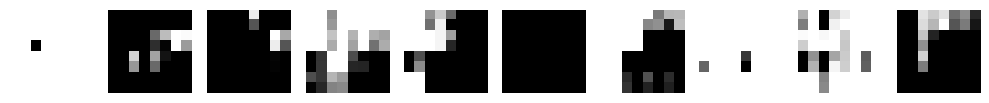

In [54]:
fig, axes = plt.subplots(1, num_samples, figsize=(10, 5))
for i in range(num_samples):
    axes[i].imshow(torch.clamp(samples[i].squeeze(), 0, 1), cmap='gray')
    axes[i].axis('off')
plt.tight_layout()
plt.show()